Họ và tên: Nguyễn Khả Tiến

MSSV: 19522337

Lớp: CS232.L21.KHCL

In [1]:
import cv2 as cv
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

RLE Encoding: 

In [2]:
def rle_encoding(img):
    encoding=[]
    prev_pixel=img[0]
    count=1
    for i in range(1,len(img)):
        if img[i]!=prev_pixel:
            encoding.append(count)
            encoding.append(prev_pixel)
            prev_pixel=img[i]
            count=1
        else:
            count+=1
    #còn 1 thằng cuối cùng
    encoding.append(count)
    encoding.append(prev_pixel)
    return encoding

RLE Decoding:

In [3]:
def rle_decoding(img):
    decoding=[]
    i=1
    while i!=len(img)-1:
        decoding+=[img[i] for k in range(img[i-1])]
        i+=2
    #thằng cuối cùng:
    decoding+=[img[i] for k in range(img[i-1])]
    return decoding

Download images:

In [4]:
pwd

'/content'

In [5]:
!gdown --id 1_neQ0wd89AOfuYp85BsNO-Oq4hmymgnc

Downloading...
From: https://drive.google.com/uc?id=1_neQ0wd89AOfuYp85BsNO-Oq4hmymgnc
To: /content/rletest.zip
4.18MB [00:00, 36.7MB/s]


In [6]:
!unzip rletest.zip

Archive:  rletest.zip
   creating: rletest/
  inflating: rletest/rletest1.bmp    
  inflating: rletest/rletest2.bmp    
  inflating: rletest/rletest3.bmp    
  inflating: rletest/rletest4.bmp    
  inflating: rletest/rletest5.bmp    
  inflating: rletest/rletest6.bmp    
  inflating: rletest/rletest7.bmp    
  inflating: rletest/rletest8.bmp    


In [7]:
cd rletest/

/content/rletest


Kiểm tra ảnh lưu bao nhiêu bit:

In [8]:
for i in range(1,9):
    temp = 'rletest%s.bmp' %i
    img = cv.imread(temp, 0)
    print('dtype of image i:', img.dtype)

dtype of image i: uint8
dtype of image i: uint8
dtype of image i: uint8
dtype of image i: uint8
dtype of image i: uint8
dtype of image i: uint8
dtype of image i: uint8
dtype of image i: uint8


Hàm Encoding của sẽ trả về 1 list gồm các phần tử kiểu int (4 bytes=32 bit)

Mỗi phần tử trong ma trận được đọc từ cv2 sẽ có dạng là 8 bits

Nên hệ số nén sẽ được tính như sau:

In [9]:
def hesonen(a,b):
    return round((32*a)/(8*b), 2)

RLE with original gray images

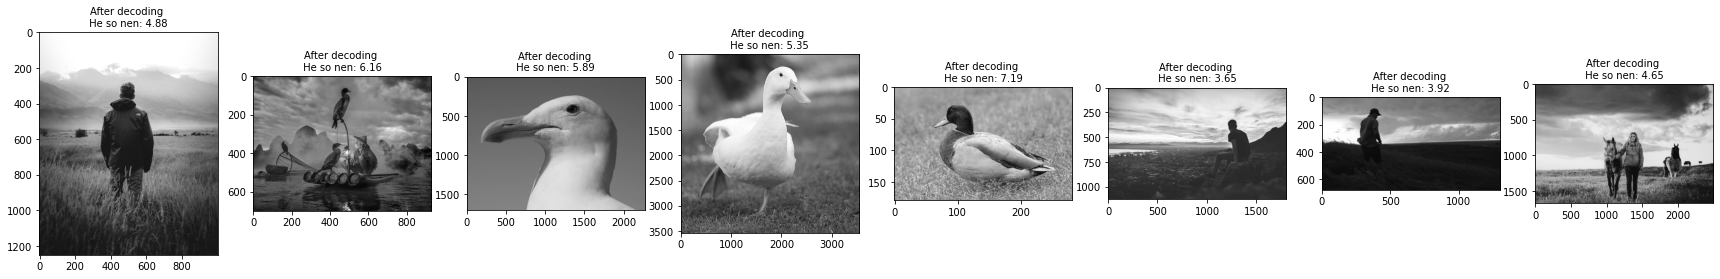

In [10]:
fig=plt.figure(figsize=(30, 15))
columns = 8
rows = 1
o=1
for i in range(1,9):
    temp = 'rletest%s.bmp' %i
    img = cv.imread(temp, 0)
    old_shape = img.shape#lấy shape cũ để sau này decode ra hiển thị lại ảnh được
    img = img.reshape(1, -1)# flatten ảnh để dễ thao tác
    temp1 = rle_encoding(img[0])#encoding
    a=len(temp1)#số phần tử cần lưu trữ
    b=img.shape[1]#số phần tử ban đầu
    temp2 = (np.array(rle_decoding(temp1))).reshape(old_shape[0], old_shape[1])#decoding
    plt.subplot(rows, columns, o)
    plt.title(f'After decoding \n He so nen: {hesonen(a,b)} ', fontsize=10)
    plt.imshow(temp2,cmap='gray')
    o+=1
plt.show()

Nhận xét: đối với ảnh với mức giá trị xám bình thường thì mang lại hệ số nén không tốt.

RLE with binary images:

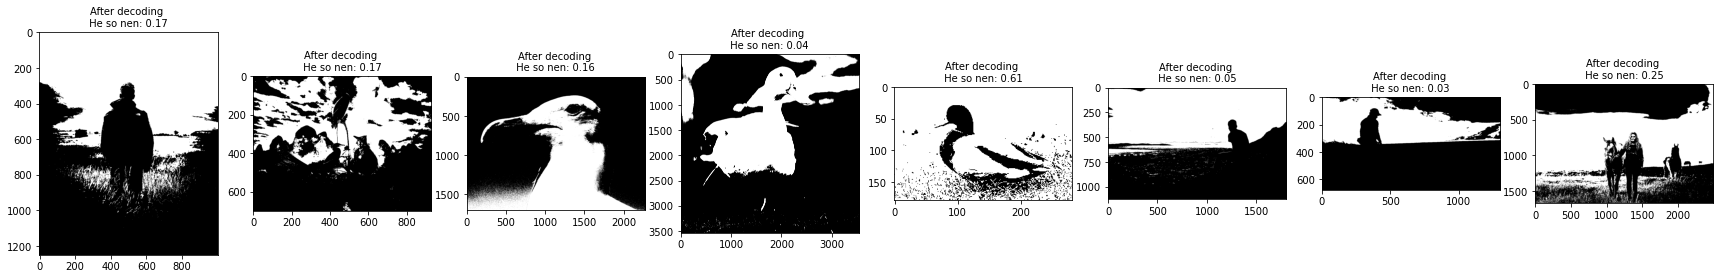

In [11]:
fig=plt.figure(figsize=(30, 15))
columns = 8
rows = 1
o=1
for i in range(1,9):
    temp = 'rletest%s.bmp' %i
    img = cv.imread(temp, 0)
    old_shape = img.shape#lấy shape cũ để sau này decode ra hiển thị lại ảnh được
    (thresh, img) = cv.threshold(img, 127, 255, cv.THRESH_BINARY)#chuyển về ảnh nhị phân
    img = img.reshape(1, -1)# flatten ảnh để dễ thao tác
    temp1 = rle_encoding(img[0])#encoding
    a=len(temp1)#số phần tử cần lưu trữ
    b=img.shape[1]#số phần tử ban đầu
    temp2 = (np.array(rle_decoding(temp1))).reshape(old_shape[0], old_shape[1])#decoding
    plt.subplot(rows, columns, o)
    plt.title(f'After decoding \n He so nen: {hesonen(a,b)} ', fontsize=10)
    plt.imshow(temp2,cmap='gray')
    o+=1
plt.show()

Nhận xét: với ảnh nhị phân thì kết quả hệ số nén thể hiện là rất tốt!